In [2]:
import pandas as pd
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid", palette="pastel", color_codes=True)

load_dotenv()
os.chdir(os.getenv("ROOT_DIR"))

In [3]:
# --- PARAMS --- #
train_data_path = os.getenv("DF_TRAIN_PATH")
test_data_path = os.getenv("DF_NEW_DATA_PATH")

print(train_data_path)
print(test_data_path)

data/raw/train.csv
data/raw/test.csv


In [4]:
# --- LOAD DATA --- #
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
# Project
### 1. Check consistency
### 4. Check correlation with target
### 5. Multivariate Analysis

### 1. Check consistency

In [7]:
train_data.isnull().sum()
# not nan values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_data.isna().sum()
# not nan values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
train_data.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [10]:
test_data.SibSp.value_counts()

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

In [11]:
train_data.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [12]:
test_data.Parch.value_counts()

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

### 2. Check correlation with target

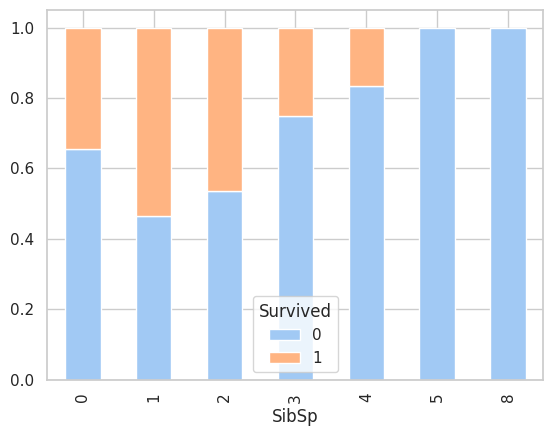

In [22]:
pd.crosstab(train_data.SibSp, train_data.Survived, normalize='index').plot(kind='bar', stacked=True)
plt.show()

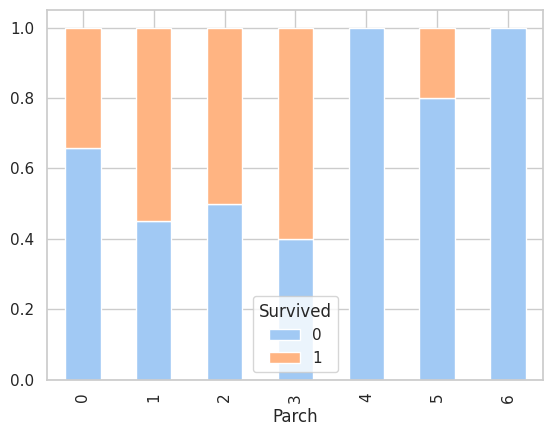

In [23]:
pd.crosstab(train_data.Parch, train_data.Survived, normalize='index').plot(kind='bar', stacked=True)
plt.show()

In [24]:
# INSIGHT-1: It is clear that bigger families have less chances of survival.

In [25]:
import statsmodels.api as sm

tmp = train_data[['SibSp', 'Parch', 'Survived']].dropna()
x = tmp[['SibSp', 'Parch']]
x = sm.add_constant(x)
y = tmp['Survived']

# fit
logit_model = sm.Logit(y, x).fit()
print(logit_model.summary())

# It reinforces the insight-1.

Optimization terminated successfully.
         Current function value: 0.659762
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                0.009236
Time:                        06:50:55   Log-Likelihood:                -587.85
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                  0.004171
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5052      0.080     -6.331      0.000      -0.662      -0.349
SibSp         -0.1603      0.

### Results

- INSIGHT-1: It is clear that bigger families have less chances of survival.

We add both variables to model.
